# `1` va `4`

KErakli kutubxonalaarni chaqirib olamiz

In [1]:
import fastai
import torch

print(fastai.__version__)
print(torch.__version__)

2.7.14
2.1.0+cu121


Kerakli datasetni yuklab olamiz

Va ichidan 1 va 4 sonlariga tegishli datasetlarni saqlab olamiz,
bu keyin ishlatish uchun

In [2]:
from fastai.vision.all import *

# path
path = untar_data(URLs.MNIST)

ones = (path/'training'/'1').ls().sorted()
fours = (path/'training'/'4').ls().sorted()

Shu datasetni ichidagi rasmlardan birini index orqali chaqirib olib ko'rishimiz mumkin

In [3]:
img1 = Image.open(ones[23])
img1

In [4]:
img4 = Image.open(fours[1])
img4

Shu kichik rasmdagi raqamlarni boshqacha yani pixellar ko'rinishida chiqaramiz

In [5]:
import pandas as pd

img1_tensor = tensor(img1)
df = pd.DataFrame(img1_tensor)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,64,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,255,191,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,128,191,255,255,255,255,191,0,0,0,0,0,0,0,0,0


shu rasmlarni hammasini tensor ko'rinishigga o'tkazib oldik

In [6]:
one_tensors = [tensor(Image.open(i)) for i in ones]
four_tensors = [tensor(Image.open(i)) for i in fours]

rasmni boshqacha o=ko'rinishda chiqarddik

<Axes: >

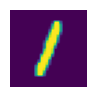

In [7]:
show_image(one_tensors[56])

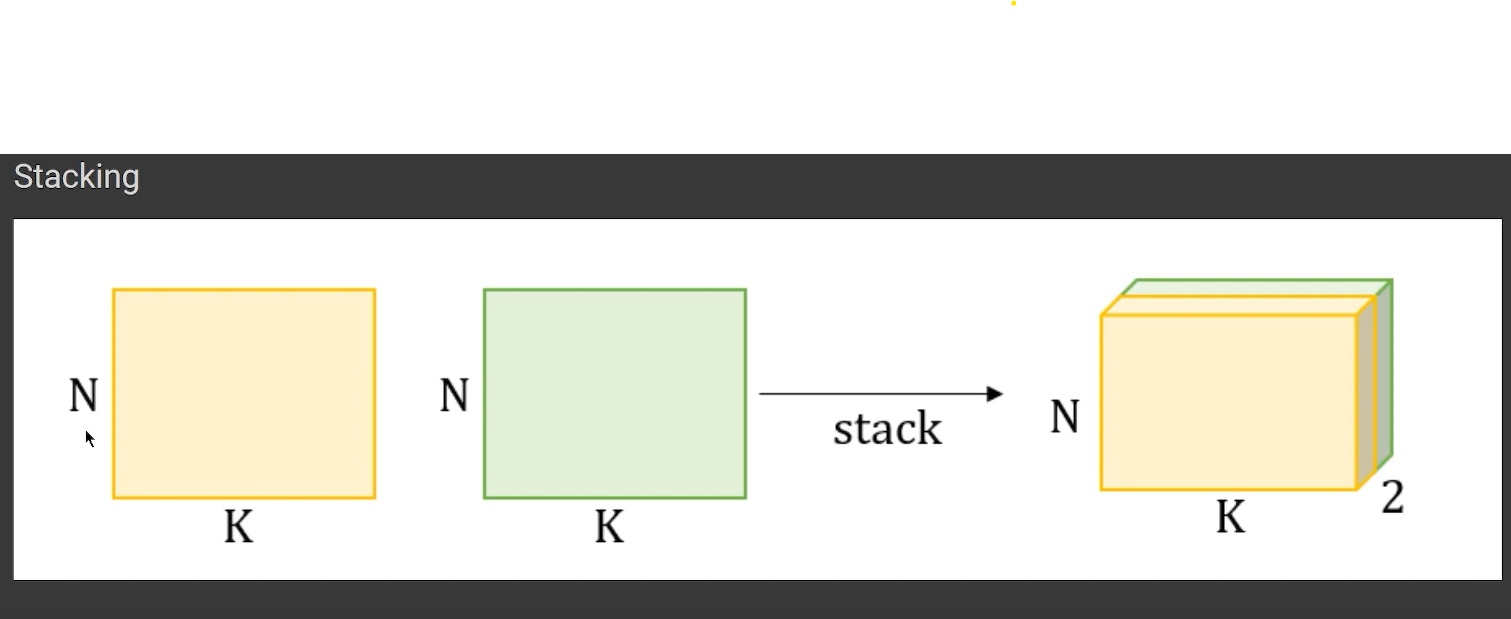

endi rasmlarimizni tepadagi rasmga o'xshatib oldik, endi ularni o'rtacha qiymatini olishimiz uchun oson bo'ldi

In [8]:
stacked_ones = torch.stack(one_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_ones.shape

torch.Size([6742, 28, 28])

Endi shu barcha rasmlardan  iborat ideal 3 raqamini ko'rishingiz mumkin

<Axes: >

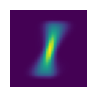

In [9]:
mean1 = stacked_ones.mean(0)
mean4 = stacked_fours.mean(0)
show_image(mean1)

# Absolyut xatolik

MAE - L1 norm

RMSE - L2 norm

<Axes: >

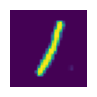

In [27]:
s_1 = stacked_ones[1]
s_4 = stacked_fours[1]
show_image(s_1)

1 soni uchun ideal 1 va datasetdagi ixtiyoriy indexdagi 1 soni o'rtasidagi absolyut xatoliklar

In [11]:
# MAE
mae = (s_1 - mean1).abs().mean()

# RMSE
rmse = ((s_1-mean1)**2).mean().sqrt()

mae, rmse

(tensor(0.0601), tensor(0.1520))

4 soni uchun ideal 4 soni va datasetdagi ixtiyoriy 1 soni uchun solishtirish va absolyut xatoliklar

In [12]:
# MAE
mae = (s_1 - mean4).abs().mean()

# RMSE
rmse = ((s_1-mean4)**2).mean().sqrt()

mae, rmse

(tensor(0.1334), tensor(0.2507))

In [15]:
(path/'testing').ls()

(#10) [Path('/root/.fastai/data/mnist_png/testing/5'),Path('/root/.fastai/data/mnist_png/testing/4'),Path('/root/.fastai/data/mnist_png/testing/8'),Path('/root/.fastai/data/mnist_png/testing/7'),Path('/root/.fastai/data/mnist_png/testing/6'),Path('/root/.fastai/data/mnist_png/testing/3'),Path('/root/.fastai/data/mnist_png/testing/9'),Path('/root/.fastai/data/mnist_png/testing/2'),Path('/root/.fastai/data/mnist_png/testing/1'),Path('/root/.fastai/data/mnist_png/testing/0')]

# UnderHood.2

`1` va `4` sonlari yig'ilgan `test` datasetni yangi o'zgaruvchilarga saqlab oldik.

ularni ramlarni ochib oldik, keyin tensorga aylantirib oldik(bu ishimizni ko'rinishini huddi matritsa ko'rinishida ishlaganday bo'ladi) keyin tepadagi rasm orqali ustma-ust qilib joylab oldik, va oxirida esa shu qiymatlarni 0 va 1 sonlari oralig'ida joylab oldik

In [16]:
testing_1 = (torch.stack([tensor(Image.open(i)) for i in (path/'testing'/'1').ls()])).float()/255
testing_4 = (torch.stack([tensor(Image.open(i)) for i in (path/'testing'/'1').ls()])).float()/255

`MAE` - funksiya yasaymiz

In [19]:
def MAE(a, b):
  return (a-b).abs().mean((-1, -2))

# tekshirish
# MAE(s_1, mean1)

mae_1 = MAE(testing_1, mean1)
mae_4 = MAE(testing_4, mean4)

# `BroadCasting`

In [25]:
def son_1(qiymat):
  return MAE(qiymat, mean1) < MAE(qiymat, mean4)

def son_4(qiymat):
  return MAE(qiymat, mean4) < MAE(qiymat, mean1)

# tekshirish
# son_1(s_1)

Endi modelimiz hech qanday kutubxonalarsiz faqat kod yozish orqali aniqligini bilishimiz va ishlashini tushunishimiz mumkin

In [45]:
accuracy_1 = son_1(testing_1).float().mean()
accuracy_4 = son_4(testing_4).float().mean()

accuracy_1, accuracy_4, (accuracy_1 + accuracy_4)/2

(tensor(1.), tensor(0.), tensor(0.5000))

# `Wrong Answer`

Natija men kutganday chiqmadi
accuracy_4 soni ham 0 chiqmasiligi kerak edi va accuracy_1 soni 100 % chiqmasligi kerak edi